In [2]:
from PIL import Image
import numpy as np
from numpy.fft import fft2, fftshift
from scipy.signal import convolve2d
from math import factorial as fact #saving characters
import matplotlib.pyplot as plt


In [3]:
def to_grayscale(img): 
        return np.dot(img[:, :, :3], [0.2989, 0.5870, 0.1140]) #standard luminance formula from rgb

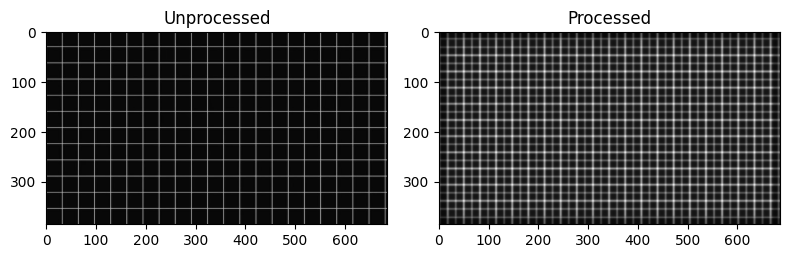

In [4]:
psf = np.load("../psfs/sss.npy")

img = Image.open("../in/hq720.jpg")
img_arr = np.array(img)

grey = to_grayscale(img_arr) #TODO make this work with 3 channel RGB. need to convolve with each color freq
processed = convolve2d(grey, psf, mode="same", boundary="fill")
        
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(grey, cmap='gray')
axes[0].set_title("Unprocessed")
axes[1].imshow(processed, cmap='gray')
axes[1].set_title("Processed")
plt.tight_layout()
plt.show()



In [13]:
processed_img = [RGBconvolve(img_arr[:, :, channel_idx]) for channel_idx in range(3)]
proc_uint8 = np.stack([float_to_uint8(processed_img[i]) for i in range(3)], axis=-1)


In [15]:
len(proc_uint8.shape)

3

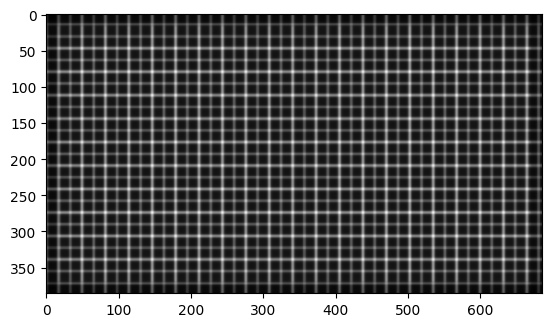

In [14]:
plt.imshow(proc_uint8)
